In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glhmm.glhmm as glhmm

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
data_tmp = pd.read_csv('docs/notebooks/example_data/data.csv', header=None)
T_t_tmp = pd.read_csv('docs/notebooks/example_data/T.csv', header=None)
data = data_tmp.to_numpy()
T_t = T_t_tmp.to_numpy()

In [7]:
data.shape

(20000, 50)

In [5]:
T_t[0]

array([   0, 1000])

In [3]:
hmm = glhmm.glhmm(model_beta='no', K=4, covtype='full')
hmm.train(X=None, Y=data, indices=T_t)

Init repetition 1 free energy = 1379431.1749053134
Init repetition 2 free energy = 1379418.3322331514
Init repetition 3 free energy = 1379148.57296387
Init repetition 4 free energy = 1379193.8037231124
Init repetition 5 free energy = 1378762.7780806874
Best repetition: 5
Cycle 1 free energy = 1378609.709997828
Cycle 2 free energy = 1378016.4525896844
Cycle 3, free energy = 1377744.7624448396, relative change = 0.31411169834073416
Cycle 4, free energy = 1377531.5770343042, relative change = 0.19773573181424717
Cycle 5, free energy = 1377366.6836512636, relative change = 0.13265477718659907
Cycle 6, free energy = 1377227.9188920795, relative change = 0.10042383295623997
Cycle 7, free energy = 1377101.487477091, relative change = 0.08382809118034584
Cycle 8, free energy = 1376966.1546020492, relative change = 0.08234153554503991
Cycle 9, free energy = 1376842.1689952845, relative change = 0.07014581646834017
Cycle 10, free energy = 1376726.9678262034, relative change = 0.0611879687071735


(array([[3.97825604e-03, 4.81740135e-03, 1.79137842e-03, 9.89412964e-01],
        [2.86678155e-04, 1.27796999e-03, 1.37679507e-04, 9.98297672e-01],
        [1.36129697e-04, 9.92960692e-06, 1.87905970e-03, 9.97974881e-01],
        ...,
        [6.23677652e-09, 8.99019296e-08, 6.30673797e-01, 3.69326107e-01],
        [1.90715564e-08, 2.69187850e-05, 2.53178918e-02, 9.74655170e-01],
        [2.10657980e-06, 1.28762565e-04, 4.73738746e-03, 9.95131743e-01]]),
 array([[[2.41546047e-04, 3.91011231e-05, 6.98052048e-06, 3.69062835e-03],
         [6.98847701e-06, 8.73070921e-04, 2.36397535e-06, 3.93497798e-03],
         [9.02709433e-07, 3.19354537e-06, 6.63011533e-05, 1.72098101e-03],
         [3.72409208e-05, 3.62604397e-04, 6.20338576e-05, 9.88951085e-01]],
 
        [[3.80689518e-05, 3.84990955e-08, 1.26595191e-05, 2.35911185e-04],
         [5.46043468e-06, 4.26171606e-06, 2.12542624e-05, 1.24699357e-03],
         [8.50192749e-08, 1.87902612e-09, 7.18536636e-05, 6.57389448e-05],
         [9.2

In [4]:
K = hmm.hyperparameters["K"] # the number of states
q = data.shape[1] # the number of parcels/channels
TP = np.zeros(shape=(K, K))
TP = hmm.P # the transition probability matrix
state_means = np.zeros(shape=(q, K))
state_means = hmm.get_means() # the state means in the shape (no. features, no. states)
state_FC = np.zeros(shape=(q, q, K))
for k in range(K):
    state_FC[:,:,k] = hmm.get_covariance_matrix(k=k) # the state covariance matrices in the shape (no. features, no. features, no. states)

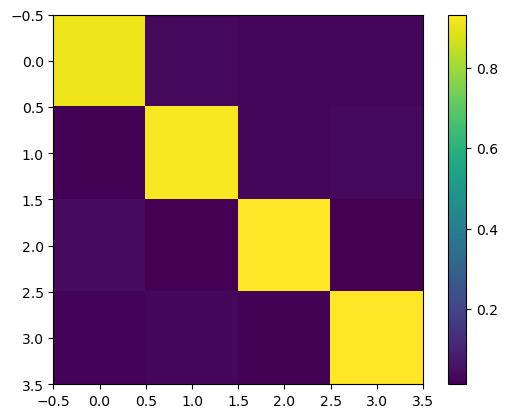

In [5]:
plt.imshow(TP)
plt.colorbar()
plt.show()

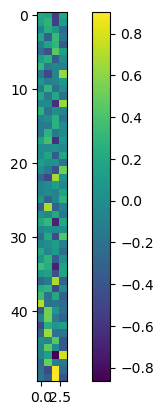

In [6]:
plt.imshow(state_means)
plt.colorbar()
plt.show()

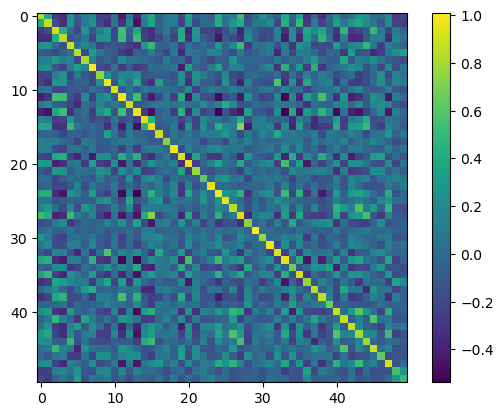

In [7]:
plt.imshow(state_FC[:,:,0])
plt.colorbar()
plt.show()